In [1]:
import numpy as np   # Linear Algebra
import pandas as pd  # Data manipulation
from sklearn.preprocessing import LabelEncoder  #for label encoding
import matplotlib.pyplot as plt  # # Data Visualization, magic functio which shows plot inside the J Notebook
%matplotlib inline
import seaborn as sns  # For Data Visualization
import os

In [2]:
# Reading required Datasets
proj = pd.read_csv('/Users/sowmy/Documents/projects/DonorsChoose/projects.csv/projects.csv')
outc = pd.read_csv('/Users/sowmy/Documents/projects/DonorsChoose/outcomes.csv/outcomes.csv')
essa = pd.read_csv('/Users/sowmy/Documents/projects/DonorsChoose/essays.csv/essays.csv')

In [3]:
# reading first five rows of the dataset
proj.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11


In [4]:
# printing Column names
print(proj.columns)

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted'],
      dtype='object')


In [5]:
#converting 'date_posted' to datetime
proj['date_posted'] = pd.to_datetime(proj['date_posted'])

In [6]:
# reading min 'date_posed'
proj['date_posted'].min()

Timestamp('2002-09-13 00:00:00')

In [7]:
proj.date_posted.max()

Timestamp('2014-05-12 00:00:00')

In [8]:
# Reading no.of rows and columns of the Project data
proj.shape

(664098, 35)

In [9]:
# reading first five rows of the eassay dataset
essa.head()

,projectid,teacher_acctid,title,short_description,need_statement,essay
0,ffffc4f85b60efc5b52347df489d0238,c24011b20fc161ed02248e85beb59a90,iMath,It is imperative that teachers bring technolog...,My students need four iPods.,I am a fourth year fifth grade math teacher. T...
1,ffffac55ee02a49d1abc87ba6fc61135,947066d0af47e0566f334566553dd6a6,Recording Rockin' Readers,Can you imagine having to translate everything...,My students need a camcorder.,Can you imagine having to translate everything...
2,ffff97ed93720407d70a2787475932b0,462270f5d5c212162fcab11afa2623cb,Kindergarten In Need of Important Materials!,It takes a special person to donate to a group...,My students need 17 assorted classroom materia...,Hi. I teach a wonderful group of 4-5 year old ...
3,ffff7266778f71242675416e600b94e1,b9a8f14199e0d8109200ece179281f4f,Let's Find Out!,My Kindergarten students come from a variety o...,"My students need 25 copies of Scholastic's ""Le...",My Kindergarten students come from a variety o...
4,ffff418bb42fad24347527ad96100f81,e885fb002a1d0d39aaed9d21a7683549,Whistle While We Work!,"By using the cross curricular games requested,...",My students need grade level appropriate games...,All work and no play makes school a dull place...


In [10]:
essa.shape

(664098, 6)

In [11]:
# Checking for missing values
essa.isnull().sum()

projectid               0
teacher_acctid          0
title                  17
short_description     132
need_statement       1472
essay                   3
dtype: int64

In [12]:
# Droping the missing values
essa.dropna(inplace=True)

In [13]:
essa.isnull().sum()

projectid            0
teacher_acctid       0
title                0
short_description    0
need_statement       0
essay                0
dtype: int64

In [14]:
# reading first rows of the outcome dataset
outc.head()

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,ffffc4f85b60efc5b52347df489d0238,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
1,ffffac55ee02a49d1abc87ba6fc61135,f,f,t,t,f,t,f,f,57.0,0.0,7.0
2,ffff97ed93720407d70a2787475932b0,f,f,t,t,t,t,t,f,100.0,0.0,3.0
3,ffff418bb42fad24347527ad96100f81,f,f,f,t,t,f,f,f,100.0,0.0,1.0
4,ffff2d9c769c8fb5335e949c615425eb,t,t,t,t,t,f,t,f,63.0,6.0,2.0


In [15]:
outc.shape

(619326, 12)

In [16]:
#droping columns
outc.drop(columns=['at_least_1_teacher_referred_donor','at_least_1_teacher_referred_donor',
     'at_least_1_green_donation','three_or_more_non_teacher_referred_donors',
    'one_non_teacher_referred_donor_giving_100_plus','donation_from_thoughtful_donor',
     'great_messages_proportion','teacher_referred_count','non_teacher_referred_count','fully_funded','great_chat'], inplace=True)

In [17]:
outc.head()

,projectid,is_exciting
0,ffffc4f85b60efc5b52347df489d0238,f
1,ffffac55ee02a49d1abc87ba6fc61135,f
2,ffff97ed93720407d70a2787475932b0,f
3,ffff418bb42fad24347527ad96100f81,f
4,ffff2d9c769c8fb5335e949c615425eb,t


In [18]:
outc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619326 entries, 0 to 619325
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   projectid    619326 non-null  object
 1   is_exciting  619326 non-null  object
dtypes: object(2)
memory usage: 9.5+ MB


In [19]:
outc['is_exciting'].value_counts()

f    582616
t     36710
Name: is_exciting, dtype: int64

In [20]:
outc['is_exciting'].value_counts(normalize = True) * 100

f    94.072589
t     5.927411
Name: is_exciting, dtype: float64

# Merging Datasets




In [21]:
#merging project and essay datasets
data = pd.merge(proj, essa)

In [22]:
data.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,title,short_description,need_statement,essay
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,555.81,653.89,32.0,f,f,2014-05-12,Multiculturalism in Literacy,Can we read one more chapter? Do we have to go...,My students need 3 novel sets with multicultur...,Can we read one more chapter? Do we have to go...
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,296.47,348.79,22.0,f,f,2014-05-12,Reading is the Window to the World!,Engaging reading materials sent right to my st...,My students need exciting reading materials li...,Engaging reading materials sent right to my st...
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,430.89,506.93,17.0,f,f,2014-05-11,A Little Tech Goes A Long Way,Our second grade in rural Oregon is an adventu...,My students need an iPad Mini.,Our second grade in rural Oregon is an adventu...
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,576.07,677.73,12.0,f,f,2014-05-11,"Provide Content Aligned, Leveled Texts, For Sc...",Help give 12 Brooklyn students access and orga...,My students need social studies literature res...,Help give 12 Brooklyn students access and orga...
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,408.40,480.47,24.0,f,f,2014-05-11,Multi-Media Cart,Technology is changing the world as we speak. ...,My students need a multi-media workstation car...,Technology is changing the world as we speak. ...


In [23]:
data.shape

(662484, 39)

In [24]:
#merging data and outcome dataset
doch = pd.merge(data,outc, on='projectid', how='left') 

In [25]:
doch.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,title,short_description,need_statement,essay,is_exciting
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,653.89,32.0,f,f,2014-05-12,Multiculturalism in Literacy,Can we read one more chapter? Do we have to go...,My students need 3 novel sets with multicultur...,Can we read one more chapter? Do we have to go...,NaN
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,348.79,22.0,f,f,2014-05-12,Reading is the Window to the World!,Engaging reading materials sent right to my st...,My students need exciting reading materials li...,Engaging reading materials sent right to my st...,NaN
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,506.93,17.0,f,f,2014-05-11,A Little Tech Goes A Long Way,Our second grade in rural Oregon is an adventu...,My students need an iPad Mini.,Our second grade in rural Oregon is an adventu...,NaN
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,677.73,12.0,f,f,2014-05-11,"Provide Content Aligned, Leveled Texts, For Sc...",Help give 12 Brooklyn students access and orga...,My students need social studies literature res...,Help give 12 Brooklyn students access and orga...,NaN
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,480.47,24.0,f,f,2014-05-11,Multi-Media Cart,Technology is changing the world as we speak. ...,My students need a multi-media workstation car...,Technology is changing the world as we speak. ...,NaN


In [26]:
doch.shape

(662484, 40)

In [27]:
doch.date_posted.max()

Timestamp('2014-05-12 00:00:00')

In [28]:
doch.isnull().sum()

projectid                                      0
teacher_acctid                                 0
schoolid                                       0
school_ncesid                              42492
school_latitude                                0
school_longitude                               0
school_city                                    0
school_state                                   0
school_zip                                     4
school_metro                               81771
school_district                              915
school_county                                 17
school_charter                                 0
school_magnet                                  0
school_year_round                              0
school_nlns                                    0
school_kipp                                    0
school_charter_ready_promise                   0
teacher_prefix                                 4
teacher_teach_for_america                      0
teacher_ny_teaching_

In [29]:
data['date_posted'].max()

Timestamp('2014-05-12 00:00:00')

In [30]:
#Spliting data into  train and test set according to date 
train = doch[doch['date_posted'] <='2014-01-01']
test = doch[doch['date_posted']>='2014-01-01']


In [31]:
train.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,title,short_description,need_statement,essay,is_exciting
44405,bb085d3e4e07deeff4992ca2eb4d1bce,e8f9a695f9e07f94a66408c6ef1960dd,20331a9c4068c933774735311861fd9c,3.600078e+11,40.774338,-73.984751,New York,NY,10023.0,urban,...,908.45,100.0,f,f,2014-01-01,Technology - Like Jumping Through The Rabbit's...,Ever have that sinking feeling when the copy m...,My students need a laptop Chromebook computer ...,Ever have that sinking feeling when the copy m...,NaN
44406,cc06856f0e48ca63b529352abf4203fd,bcb9c8fcacb7ff431ba73d002b0e7d75,b74ff738ff6dff9943701adbaac7efc7,3.600078e+11,40.773753,-73.985376,New York,NY,10023.0,urban,...,545.14,198.0,f,f,2014-01-01,We Need Bunsen Burners!,The lab is where science comes to life and stu...,My students need 17 Bunsen burners for our lab...,The lab is where science comes to life and stu...,NaN
44407,ae1d159a475fcd677f12c964bf8e3d24,0e19db1513a0c79b954c9b6deab0a3ec,8be9741df5fca4a18c9786a2e924e6dc,5.063300e+10,35.351376,-94.340373,Fort Smith,AR,72903.0,urban,...,488.39,28.0,t,f,2014-01-01,Teaching Econ Through Technology,How bored do you get just sitting in a desk an...,My students need an iPad mini with cover!,How bored do you get just sitting in a desk an...,NaN
44408,c4d5660b590be04fbce7448581152150,da18d82137b7b748b62c0663ba981fd6,3f84ab7c50ec28a525a4ca895c501f5b,2.744190e+11,46.617071,-92.382084,Wrenshall,MN,55797.0,rural,...,228.49,15.0,f,f,2014-01-01,Shaken' It Up With Shuffles!,"Recently, during a workshop, I was given a par...",My students need three iPod shuffles to rejuve...,"Recently, during a workshop, I was given a par...",NaN
44409,ab9306f017a1866836db431ed4110f25,085c3acfa53bc13ea2d5b0752c523df8,a2da3241bccb97ea967039fe12734cc7,2.200125e+11,30.515228,-90.992871,Greenwel Spgs,LA,70739.0,NaN,...,354.92,21.0,f,f,2014-01-01,No Habla Ingles,Successful completion of kindergarten includes...,My students need 2 sets of realistic photo car...,Successful completion of kindergarten includes...,NaN


In [32]:
train.shape

(618079, 40)

In [33]:
test.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,title,short_description,need_statement,essay,is_exciting
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,653.89,32.0,f,f,2014-05-12,Multiculturalism in Literacy,Can we read one more chapter? Do we have to go...,My students need 3 novel sets with multicultur...,Can we read one more chapter? Do we have to go...,NaN
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,348.79,22.0,f,f,2014-05-12,Reading is the Window to the World!,Engaging reading materials sent right to my st...,My students need exciting reading materials li...,Engaging reading materials sent right to my st...,NaN
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,506.93,17.0,f,f,2014-05-11,A Little Tech Goes A Long Way,Our second grade in rural Oregon is an adventu...,My students need an iPad Mini.,Our second grade in rural Oregon is an adventu...,NaN
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,677.73,12.0,f,f,2014-05-11,"Provide Content Aligned, Leveled Texts, For Sc...",Help give 12 Brooklyn students access and orga...,My students need social studies literature res...,Help give 12 Brooklyn students access and orga...,NaN
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,480.47,24.0,f,f,2014-05-11,Multi-Media Cart,Technology is changing the world as we speak. ...,My students need a multi-media workstation car...,Technology is changing the world as we speak. ...,NaN


In [34]:
test.shape

(44772, 40)

# Exploratory Data Analysis

In [35]:
train.describe()

,school_ncesid,school_latitude,school_longitude,school_zip,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached
count,5.794490e+05,618079.000000,618079.000000,618075.000000,584550.000000,618079.000000,6.180790e+05,617935.000000
mean,2.614825e+11,37.225841,-93.394701,53061.645990,27.306097,519.786371,6.182976e+02,97.633578
std,1.589610e+11,4.651434,17.755313,31192.047665,8.957319,1634.653072,1.981175e+03,2366.451161
min,1.000050e+10,18.249140,-176.634989,410.000000,9.000000,0.000000,0.000000e+00,0.000000
25%,1.000200e+11,34.037704,-112.026142,27608.000000,17.000000,267.420000,3.180100e+02,22.000000
50%,2.620340e+11,37.624116,-87.688786,53029.000000,30.000000,410.990000,4.879400e+02,30.000000
75%,3.704720e+11,40.758552,-79.287151,85122.000000,35.000000,580.680000,6.902400e+02,100.000000
max,6.100009e+11,67.258157,-66.628036,99950.000000,35.000000,1000000.000000,1.219512e+06,999999.000000


In [36]:
test.describe()

,school_ncesid,school_latitude,school_longitude,school_zip,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached
count,4.088400e+04,44772.000000,44772.000000,44772.000000,44772.0,44772.000000,44772.000000,44770.000000
mean,2.537160e+11,37.377279,-93.233501,52270.920620,30.0,625.865619,736.312543,94.383449
std,1.596667e+11,4.941962,17.862444,31005.482616,0.0,772.735486,909.100622,154.550441
min,1.000050e+10,19.387832,-170.184872,1020.000000,30.0,50.300000,59.180000,1.000000
25%,1.000680e+11,34.011274,-111.851896,28054.000000,30.0,270.127500,317.797500,22.000000
50%,2.502790e+11,37.764591,-87.338636,48313.000000,30.0,415.690000,489.050000,30.000000
75%,3.703480e+11,40.765168,-79.946002,84306.250000,30.0,694.550000,817.115000,100.000000
max,5.605160e+11,67.258157,-67.618477,99925.000000,30.0,40722.360000,47908.660000,999.000000


In [37]:
train.isnull().sum()

projectid                                      0
teacher_acctid                                 0
schoolid                                       0
school_ncesid                              38630
school_latitude                                0
school_longitude                               0
school_city                                    0
school_state                                   0
school_zip                                     4
school_metro                               75410
school_district                              889
school_county                                 17
school_charter                                 0
school_magnet                                  0
school_year_round                              0
school_nlns                                    0
school_kipp                                    0
school_charter_ready_promise                   0
teacher_prefix                                 0
teacher_teach_for_america                      0
teacher_ny_teaching_

In [38]:
# Checking percentage of missing values
train.isnull().sum() / train.shape[0] * 100

projectid                                  0.000000
teacher_acctid                             0.000000
schoolid                                   0.000000
school_ncesid                              6.250010
school_latitude                            0.000000
school_longitude                           0.000000
school_city                                0.000000
school_state                               0.000000
school_zip                                 0.000647
school_metro                              12.200706
school_district                            0.143833
school_county                              0.002750
school_charter                             0.000000
school_magnet                              0.000000
school_year_round                          0.000000
school_nlns                                0.000000
school_kipp                                0.000000
school_charter_ready_promise               0.000000
teacher_prefix                             0.000000
teacher_teac

In [39]:
test.isnull().sum()

projectid                                     0
teacher_acctid                                0
schoolid                                      0
school_ncesid                              3888
school_latitude                               0
school_longitude                              0
school_city                                   0
school_state                                  0
school_zip                                    0
school_metro                               6420
school_district                              26
school_county                                 0
school_charter                                0
school_magnet                                 0
school_year_round                             0
school_nlns                                   0
school_kipp                                   0
school_charter_ready_promise                  0
teacher_prefix                                4
teacher_teach_for_america                     0
teacher_ny_teaching_fellow              

In [40]:
test.isnull().sum() / test.shape[0] * 100

projectid                                   0.000000
teacher_acctid                              0.000000
schoolid                                    0.000000
school_ncesid                               8.683999
school_latitude                             0.000000
school_longitude                            0.000000
school_city                                 0.000000
school_state                                0.000000
school_zip                                  0.000000
school_metro                               14.339319
school_district                             0.058072
school_county                               0.000000
school_charter                              0.000000
school_magnet                               0.000000
school_year_round                           0.000000
school_nlns                                 0.000000
school_kipp                                 0.000000
school_charter_ready_promise                0.000000
teacher_prefix                              0.

<AxesSubplot:xlabel='school_ncesid'>

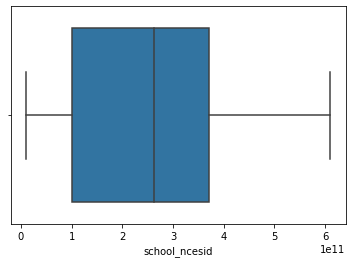

In [41]:
sns.boxplot(x=train['school_ncesid']) # checking for outliers

In [42]:
#filling values with most occur values
train['school_ncesid'] = train['school_ncesid'].fillna(train['school_ncesid'].median())

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
test['school_ncesid'].isnull().sum() / test['school_ncesid'].shape[0] * 100

8.683998927901367

In [44]:
test['school_ncesid'] = test['school_ncesid'].fillna(test['school_ncesid'].median())

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
train['school_state'].value_counts()

CA    118541
NY     69266
NC     41207
IL     37934
TX     37217
FL     28053
SC     17589
IN     16048
OK     14101
GA     13755
PA     13300
TN     13279
LA     11662
MO     11278
MI     11027
VA      9871
WA      9722
MD      8972
AZ      8949
NJ      8812
UT      8707
MA      8522
NV      8333
CT      7149
OH      7021
MS      6621
CO      6481
WI      6432
OR      6213
DC      5754
AR      5251
AL      5088
MN      4137
KY      4077
ME      3165
IA      2982
KS      2667
NM      2414
HI      2342
WV      2149
RI      1987
ID      1707
DE      1464
NE      1438
NH      1302
AK      1229
SD       889
MT       649
VT       501
ND       436
WY       386
La         3
Name: school_state, dtype: int64

In [46]:
print(train['school_zip'].dtype)
train['school_zip'].isnull().sum()

float64


4

In [47]:
#filling values with median  zip code
train['school_zip'] = train['school_zip'].fillna(train['school_zip'].median())


C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
train['school_metro'].value_counts()

urban       327471
suburban    140866
rural        74332
Name: school_metro, dtype: int64

<AxesSubplot:xlabel='school_metro', ylabel='count'>

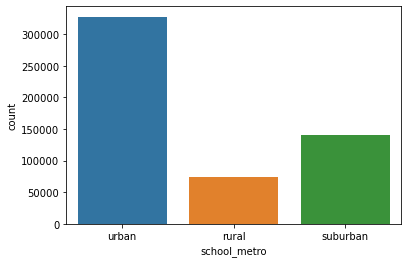

In [49]:
sns.countplot(x=train['school_metro'])

In [50]:
test['school_metro'].value_counts()

urban       20987
suburban    11426
rural        5939
Name: school_metro, dtype: int64

In [51]:
#filling values with most occured values
train['school_metro'] = train['school_metro'].fillna('urban')
test['school_metro'] = test['school_metro'].fillna('urban')

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
train['school_district'].value_counts()

New York City Dept Of Ed          52756
Los Angeles Unif Sch Dist         38126
Charlotte-mecklenburg Sch Dist     8335
Clark Co School District           7528
Hillsborough Co Pub Sch Dist       7288
                                  ...  
Alba Golden Ind School Dist           1
Chester Union Free School Dist        1
Kohler School District                1
Middleburgh Ctl School Dist           1
Keytesville School Dist R3            1
Name: school_district, Length: 9043, dtype: int64

In [53]:
test['school_district'].value_counts()

New York City Dept Of Ed          2453
Los Angeles Unif Sch Dist         1803
Camden City School District        790
Philadelphia City School Dist      516
Charlotte-mecklenburg Sch Dist     513
                                  ... 
St Martin Parish School Dist         1
School Administrative Unit 57        1
Perry County School District         1
Wyomissing Area Sch District         1
Madelia Ind School Dist 837          1
Name: school_district, Length: 4173, dtype: int64

In [54]:
#filling values with most occured values
train['school_district'] = train['school_district'].fillna('New York City Dept Of Ed')
test['school_district'] = test['school_district'].fillna('New York City Dept Of Ed')

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
train['school_county'].value_counts()

Los Angeles             47554
Cook                    30063
Kings (Brooklyn)        18490
Bronx                   17252
New York (Manhattan)    13177
                        ...  
Fergus                      1
Searcy                      1
Rich                        1
Poweshiek                   1
Gilliam                     1
Name: school_county, Length: 1689, dtype: int64

In [56]:
#filling values with most occured values
train['school_county'] = train['school_county'].fillna("Los Angeles")

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
train['primary_focus_subject'].value_counts()

Literacy                 188325
Literature & Writing      76849
Mathematics               74587
Special Needs             39027
Applied Sciences          29027
Visual Arts               28707
Environmental Science     24877
Health & Life Science     23013
Music                     19233
History & Geography       15915
Early Development         13154
Other                     12419
Social Sciences            9580
ESL                        9206
Character Education        9144
Performing Arts            7892
Gym & Fitness              6493
Health & Wellness          5995
College & Career Prep      5951
Foreign Languages          5103
Sports                     3262
Extracurricular            2890
Civics & Government        2311
Economics                  1488
Community Service          1392
Parent Involvement         1216
Nutrition                   988
Name: primary_focus_subject, dtype: int64

In [58]:
test['primary_focus_subject'].value_counts()

Literacy                 12774
Mathematics               6292
Literature & Writing      5320
Special Needs             2948
Applied Sciences          2530
Environmental Science     2247
Visual Arts               1973
Health & Life Science     1577
Music                     1336
Early Development          918
History & Geography        881
Health & Wellness          722
Other                      671
Performing Arts            632
ESL                        591
College & Career Prep      569
Gym & Fitness              560
Character Education        403
Social Sciences            385
Economics                  314
Foreign Languages          284
Sports                     267
Extracurricular            188
Nutrition                  138
Civics & Government        109
Community Service           99
Parent Involvement          41
Name: primary_focus_subject, dtype: int64

In [59]:
#filling values with most occured values
train['primary_focus_subject'] = train['primary_focus_subject'].fillna("Literacy")
test['primary_focus_subject'] = test['primary_focus_subject'].fillna("Literacy")

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
train['primary_focus_area'].value_counts()

Literacy & Language    279483
Math & Science         151504
Music & The Arts        55832
Applied Learning        46166
Special Needs           39027
History & Civics        29294
Health & Sports         16738
Name: primary_focus_area, dtype: int64

In [61]:
test['primary_focus_area'].value_counts()

Literacy & Language    18969
Math & Science         12646
Music & The Arts        3941
Special Needs           2948
Applied Learning        2889
History & Civics        1689
Health & Sports         1687
Name: primary_focus_area, dtype: int64

In [62]:
#filling values with most occured values
train['primary_focus_area'] = train['primary_focus_area'].fillna("Literacy & Language")

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
test['primary_focus_area'] = test['primary_focus_area'].fillna("Literacy & Language")

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
train['resource_type'].value_counts()

Supplies      213738
Technology    199955
Books         133942
Other          64871
Trips           4633
Visitors         898
Name: resource_type, dtype: int64

In [65]:
test['resource_type'].value_counts()

Technology    16098
Supplies      15043
Books          8186
Other          4612
Trips           730
Visitors        101
Name: resource_type, dtype: int64

In [66]:
#filling values with most occured values
train['resource_type'] = train['resource_type'].fillna("supplies")

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
test['resource_type'] = test['resource_type'].fillna("Technology")

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
train['grade_level'].value_counts()

Grades PreK-2    228177
Grades 3-5       190318
Grades 6-8       106793
Grades 9-12       92785
Name: grade_level, dtype: int64

In [69]:
test['grade_level'].value_counts()

Grades PreK-2    17385
Grades 3-5       13757
Grades 6-8        7582
Grades 9-12       6046
Name: grade_level, dtype: int64

In [70]:
#filling values with most occured values
train['grade_level'] = train['grade_level'].fillna("Grades PreK-2")

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
test['grade_level'] = test['grade_level'].fillna("Grades PreK-2")

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
train['secondary_focus_subject'].value_counts()

Literature & Writing     65210
Literacy                 61583
Mathematics              50918
Special Needs            26823
ESL                      23088
Early Development        19423
Health & Life Science    17991
Applied Sciences         16884
Environmental Science    15938
History & Geography      15571
Visual Arts              13619
Performing Arts          12938
Social Sciences          12412
Other                    11134
Character Education      10827
College & Career Prep     9483
Health & Wellness         6929
Music                     6747
Extracurricular           5270
Parent Involvement        4183
Civics & Government       4004
Gym & Fitness             3442
Community Service         2878
Sports                    2692
Foreign Languages         2048
Economics                 1824
Nutrition                 1313
Name: secondary_focus_subject, dtype: int64

In [73]:
test['secondary_focus_subject'].value_counts()

Mathematics              5035
Literacy                 4491
Literature & Writing     4386
Special Needs            1774
ESL                      1518
Applied Sciences         1364
Early Development        1202
Health & Life Science    1139
Environmental Science    1133
History & Geography       997
Performing Arts           894
Visual Arts               844
College & Career Prep     788
Social Sciences           747
Health & Wellness         688
Other                     661
Character Education       640
Music                     421
Economics                 332
Extracurricular           330
Gym & Fitness             328
Community Service         224
Sports                    216
Civics & Government       200
Nutrition                 194
Parent Involvement        153
Foreign Languages         129
Name: secondary_focus_subject, dtype: int64

In [74]:
#filling values with most occured values
train['secondary_focus_subject'] = train['secondary_focus_subject'].fillna('Literature & Writing')

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
test['secondary_focus_subject'] = test['secondary_focus_subject'].fillna('Mathematics')

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
train['secondary_focus_area'].value_counts()

Literacy & Language    151929
Math & Science         101731
Applied Learning        63198
History & Civics        33811
Music & The Arts        33304
Special Needs           26823
Health & Sports         14376
Name: secondary_focus_area, dtype: int64

In [77]:
test['secondary_focus_area'].value_counts()

Literacy & Language    10524
Math & Science          8671
Applied Learning        3998
History & Civics        2276
Music & The Arts        2159
Special Needs           1774
Health & Sports         1426
Name: secondary_focus_area, dtype: int64

In [78]:
#filling values with most occured values
train['secondary_focus_area']= train['secondary_focus_area'].fillna('Literacy & Language')

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
test['secondary_focus_area']= test['secondary_focus_area'].fillna('Literacy & Language')

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
#filling values with mean value
train['fulfillment_labor_materials'] = train['fulfillment_labor_materials'].fillna(train['fulfillment_labor_materials'].mean())

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
#filling values with most occured values
train['students_reached'] = train['students_reached'].fillna(test['students_reached'].mean())

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
test['students_reached'] = test['students_reached'].fillna(test['students_reached'].mean())

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
train.isnull().sum()

projectid                                   0
teacher_acctid                              0
schoolid                                    0
school_ncesid                               0
school_latitude                             0
school_longitude                            0
school_city                                 0
school_state                                0
school_zip                                  0
school_metro                                0
school_district                             0
school_county                               0
school_charter                              0
school_magnet                               0
school_year_round                           0
school_nlns                                 0
school_kipp                                 0
school_charter_ready_promise                0
teacher_prefix                              0
teacher_teach_for_america                   0
teacher_ny_teaching_fellow                  0
primary_focus_subject             

In [84]:
test.isnull().sum()

projectid                                     0
teacher_acctid                                0
schoolid                                      0
school_ncesid                                 0
school_latitude                               0
school_longitude                              0
school_city                                   0
school_state                                  0
school_zip                                    0
school_metro                                  0
school_district                               0
school_county                                 0
school_charter                                0
school_magnet                                 0
school_year_round                             0
school_nlns                                   0
school_kipp                                   0
school_charter_ready_promise                  0
teacher_prefix                                4
teacher_teach_for_america                     0
teacher_ny_teaching_fellow              

In [85]:
test['teacher_prefix'].value_counts()

Mrs.    21324
Ms.     17451
Mr.      5991
Dr.         2
Name: teacher_prefix, dtype: int64

In [86]:
test['teacher_prefix']= test['teacher_prefix'].fillna('Mrs.')

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
test.drop(['is_exciting'], inplace=True, axis=1)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [88]:
test.isnull().sum()

projectid                                 0
teacher_acctid                            0
schoolid                                  0
school_ncesid                             0
school_latitude                           0
school_longitude                          0
school_city                               0
school_state                              0
school_zip                                0
school_metro                              0
school_district                           0
school_county                             0
school_charter                            0
school_magnet                             0
school_year_round                         0
school_nlns                               0
school_kipp                               0
school_charter_ready_promise              0
teacher_prefix                            0
teacher_teach_for_america                 0
teacher_ny_teaching_fellow                0
primary_focus_subject                     0
primary_focus_area              

In [89]:
train.dropna(inplace=True)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
test.dropna(inplace=True)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
train.describe()

,school_ncesid,school_latitude,school_longitude,school_zip,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached
count,6.177120e+05,617712.000000,617712.000000,617712.000000,617712.000000,617712.000000,6.177120e+05,617712.000000
mean,2.615109e+11,37.225709,-93.395891,53064.188093,27.304496,519.800801,6.183186e+02,97.650012
std,1.539131e+11,4.651317,17.755667,31192.287122,8.713317,1635.103173,1.981723e+03,2366.876671
min,1.000050e+10,18.249140,-176.634989,410.000000,9.000000,0.000000,0.000000e+00,0.000000
25%,1.200390e+11,34.037704,-112.026351,27609.000000,17.000000,267.440000,3.180400e+02,22.000000
50%,2.620340e+11,37.624116,-87.689727,53038.500000,30.000000,411.000000,4.879800e+02,30.000000
75%,3.702970e+11,40.758552,-79.287151,85122.000000,35.000000,580.710000,6.902400e+02,100.000000
max,6.100009e+11,67.258157,-66.628036,99950.000000,35.000000,1000000.000000,1.219512e+06,999999.000000


<AxesSubplot:xlabel='school_ncesid'>

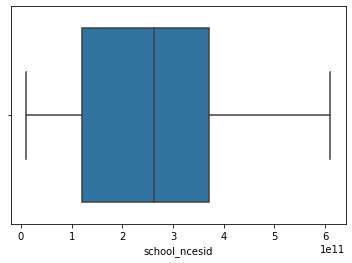

In [92]:
sns.boxplot(x = train['school_ncesid'])

<AxesSubplot:xlabel='school_latitude'>

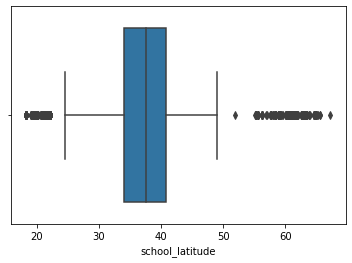

In [93]:
sns.boxplot(x = train['school_latitude'])

<AxesSubplot:xlabel='school_longitude'>

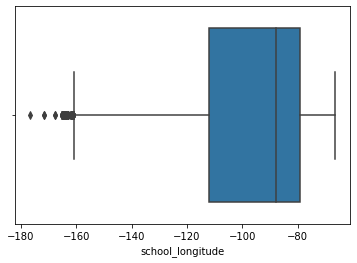

In [94]:
sns.boxplot(x = train['school_longitude'])

<AxesSubplot:xlabel='total_price_excluding_optional_support'>

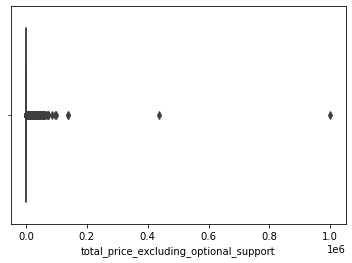

In [95]:
sns.boxplot(x = train['total_price_excluding_optional_support'])

<AxesSubplot:xlabel='students_reached'>

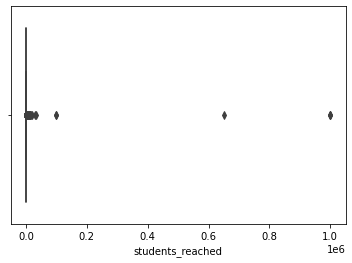

In [96]:
sns.boxplot(x = train['students_reached'])

In [97]:
train.drop(['total_price_excluding_optional_support','total_price_including_optional_support', 'students_reached'], axis=1, inplace=True)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


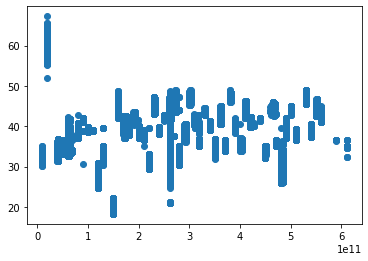

In [98]:
plt.scatter(x = train['school_ncesid'], y = train['school_latitude'])

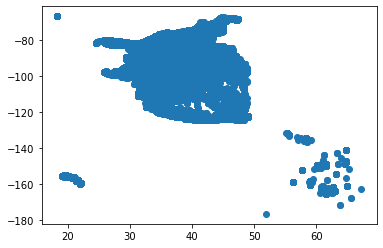

In [99]:
plt.scatter(x = train['school_latitude'], y = train['school_longitude'])

<AxesSubplot:xlabel='school_ncesid', ylabel='is_exciting'>

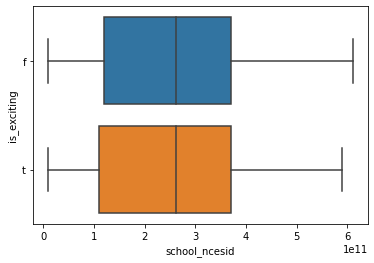

In [100]:
sns.boxplot(x = train['school_ncesid'], y = train['is_exciting'])

<AxesSubplot:xlabel='school_latitude', ylabel='is_exciting'>

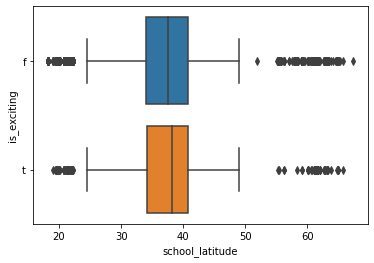

In [101]:
sns.boxplot(x = train['school_latitude'], y = train['is_exciting'])

# Feature Engineering

In [102]:
#label encoding for object data type
enc = LabelEncoder()
train['is_exciting'] = (enc.fit_transform(train['is_exciting']))

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
train['school_metro'] = (enc.fit_transform(train['school_metro']))
train['school_magnet'] = (enc.fit_transform(train['school_magnet']))
train['school_state'] = (enc.fit_transform(train['school_state']))
train['school_charter'] = (enc.fit_transform(train['school_charter']))
train['primary_focus_subject'] = (enc.fit_transform(train['primary_focus_subject']))
train['primary_focus_area'] = (enc.fit_transform(train['primary_focus_area']))
train['secondary_focus_subject'] = (enc.fit_transform(train['secondary_focus_subject']))
train['grade_level'] = (enc.fit_transform(train['grade_level']))

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [104]:
test['school_metro'] = (enc.fit_transform(test['school_metro']))
test['school_magnet'] = (enc.fit_transform(test['school_magnet']))
test['school_state'] = (enc.fit_transform(test['school_state']))
test['school_charter'] = (enc.fit_transform(test['school_charter']))
test['primary_focus_subject'] = (enc.fit_transform(test['primary_focus_subject']))
test['primary_focus_area'] = (enc.fit_transform(test['primary_focus_area']))
test['secondary_focus_subject'] = (enc.fit_transform(test['secondary_focus_subject']))
test['grade_level'] = (enc.fit_transform(test['grade_level']))

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617712 entries, 44772 to 662483
Data columns (total 37 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   projectid                          617712 non-null  object        
 1   teacher_acctid                     617712 non-null  object        
 2   schoolid                           617712 non-null  object        
 3   school_ncesid                      617712 non-null  float64       
 4   school_latitude                    617712 non-null  float64       
 5   school_longitude                   617712 non-null  float64       
 6   school_city                        617712 non-null  object        
 7   school_state                       617712 non-null  int32         
 8   school_zip                         617712 non-null  float64       
 9   school_metro                       617712 non-null  int32         
 10  school_district 

In [106]:
#checking correlation for train dataset
train.corr()

,school_ncesid,school_latitude,school_longitude,school_state,school_zip,school_metro,school_charter,school_magnet,primary_focus_subject,primary_focus_area,secondary_focus_subject,grade_level,fulfillment_labor_materials,is_exciting
school_ncesid,1.000000,0.192254,0.419152,0.963357,-0.360306,-0.056832,-0.095539,-0.056189,-0.006263,-0.009394,0.000208,-0.007960,-0.075011,-0.011940
school_latitude,0.192254,1.000000,0.142958,0.210266,-0.192925,0.119357,-0.022381,0.035457,0.024081,0.001855,0.024765,0.001541,-0.071486,0.022282
school_longitude,0.419152,0.142958,1.000000,0.418411,-0.937052,-0.009014,-0.051465,0.037747,0.009004,-0.010895,0.030321,-0.006253,-0.109889,-0.003111
school_state,0.963357,0.210266,0.418411,1.000000,-0.364457,-0.042672,-0.093322,-0.055963,-0.001237,-0.006046,0.002810,-0.011085,-0.073268,-0.011309
school_zip,-0.360306,-0.192925,-0.937052,-0.364457,1.000000,-0.006190,0.061482,-0.026369,-0.015822,0.008156,-0.036415,0.008223,0.099523,-0.000099
school_metro,-0.056832,0.119357,-0.009014,-0.042672,-0.006190,1.000000,0.102111,0.141184,0.017097,-0.000821,0.003211,0.006716,-0.020346,0.021461
school_charter,-0.095539,-0.022381,-0.051465,-0.093322,0.061482,0.102111,1.000000,-0.084541,-0.010057,-0.012948,-0.002002,0.006800,0.035669,0.046583
school_magnet,-0.056189,0.035457,0.037747,-0.055963,-0.026369,0.141184,-0.084541,1.000000,-0.012675,0.002453,-0.002081,-0.007515,-0.026043,-0.002383
primary_focus_subject,-0.006263,0.024081,0.009004,-0.001237,-0.015822,0.017097,-0.010057,-0.012675,1.000000,0.430642,0.047469,-0.004172,0.002234,0.008939
primary_focus_area,-0.009394,0.001855,-0.010895,-0.006046,0.008156,-0.000821,-0.012948,0.002453,0.430642,1.000000,-0.023943,-0.064998,0.009711,0.012113


<AxesSubplot:>

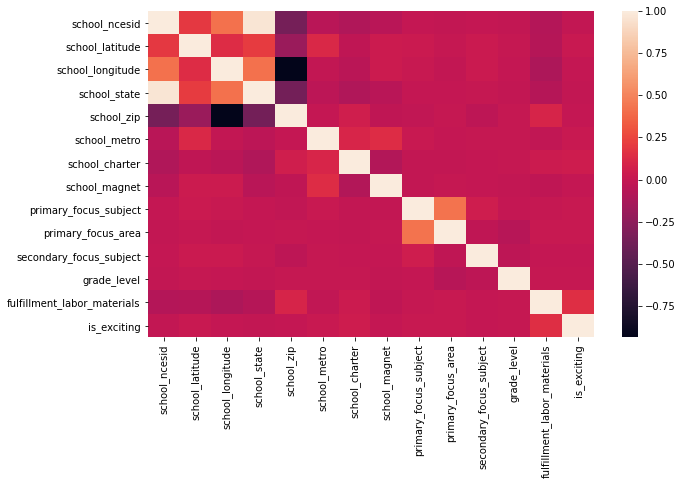

In [107]:
# check
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(train.corr())

In [108]:
#droping columns 
train.drop(['school_nlns','school_charter_ready_promise'], axis=1, inplace=True)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [109]:
train.drop(['teacher_acctid', 'schoolid','school_latitude', 'school_longitude', 'school_city',
            'school_zip', 'school_district', 'school_county','teacher_prefix','teacher_teach_for_america', 
            'teacher_ny_teaching_fellow','secondary_focus_subject', 'secondary_focus_area', 'resource_type',
            'poverty_level', 'grade_level', 'fulfillment_labor_materials','eligible_double_your_impact_match',
            'eligible_almost_home_match','date_posted', 'title','school_ncesid', 'school_state', 'school_metro',
            'school_charter', 'school_magnet', 'primary_focus_subject','primary_focus_area','short_description'], axis=1, inplace=True)

In [110]:
train.drop(['school_year_round', 'school_kipp','need_statement'], axis=1, inplace=True)

In [111]:
train.columns

Index(['projectid', 'essay', 'is_exciting'], dtype='object')

In [112]:
train.head()

,projectid,essay,is_exciting
44772,62526d85d2a1818432d03d600969e99c,"If they can't learn the way we teach, we teach...",0
44773,33d59ac771b80222ad63ef0f4ac47ade,"Which is bigger, three liters or three quarts?...",0
44774,1a3aaeffc56dd2a421e37d8298024c0a,Do you remember classrooms that used just book...,0
44775,33aa19ee4da4c5adf47d0dfb84fab5ef,My class was given the beautiful gift of books...,0
44776,e31c0ea8b68f404699dfb0d39e9bc99b,Thinking back in school science was either rea...,0


In [113]:
test.drop(['teacher_acctid', 'schoolid','school_latitude', 'school_longitude', 'school_city', 
            'school_zip', 'school_district', 'school_county','teacher_prefix','teacher_teach_for_america', 'teacher_ny_teaching_fellow','secondary_focus_subject',
            'secondary_focus_area', 'resource_type',
            'poverty_level', 'grade_level', 'fulfillment_labor_materials','total_price_excluding_optional_support',
            'total_price_including_optional_support','eligible_double_your_impact_match', 'eligible_almost_home_match','date_posted', 'title', 
            'short_description','school_ncesid', 'school_state', 'school_metro',
            'school_charter', 'school_magnet', 'primary_focus_subject','primary_focus_area', 'students_reached',], axis=1, inplace=True)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [114]:
test.drop(['school_nlns','school_charter_ready_promise','school_year_round',
           'need_statement','school_kipp'], axis=1, inplace=True)

In [115]:
test_x = test[['essay']]

# Text Preprocessing

In [116]:
train['essay'][:6]

44772    If they can't learn the way we teach, we teach...
44773    Which is bigger, three liters or three quarts?...
44774    Do you remember classrooms that used just book...
44775    My class was given the beautiful gift of books...
44776    Thinking back in school science was either rea...
44777    My classroom involves lots of creativity while...
Name: essay, dtype: object

In [117]:
test_x['essay'][:6]

0    Can we read one more chapter? Do we have to go...
1    Engaging reading materials sent right to my st...
2    Our second grade in rural Oregon is an adventu...
3    Help give 12 Brooklyn students access and orga...
4    Technology is changing the world as we speak. ...
5    In my class we have "Spectacular Style". My st...
Name: essay, dtype: object

In [118]:
train['essay'] = train['essay'].astype(str)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
test_x['essay'] = test_x['essay'].astype(str)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
#converting lower values
train['essay'] = train['essay'].str.lower()

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
test_x['essay'] = test_x['essay'].str.lower()

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
train['essay'] = train['essay'].str.strip() 
test_x['essay'] = test_x['essay'].str.strip() 

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [123]:
#https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells
#removing unnecessary charecters from the paragraph
train['essay'].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
test_x['essay'].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\pandas\core\series.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [124]:
#https://stackoverflow.com/questions/41719259/how-to-remove-numbers-from-string-terms-in-a-pandas-dataframe#:~:text=Similarly%2C%20you%20can%20use%20.,the%20end%20of%20each%20string.&text=if%20you%20want%20to%20change%20source%20dataframe%20use%20inplace%3DTrue%20.
#removing numbers from the text
train['essay'].replace('\d+', '', regex=True, inplace=True)
test_x['essay'].replace('\d+', '', regex=True, inplace=True)

In [125]:
#removing punctuation marks from text
import string   
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [126]:
train['essay'] = train['essay'].apply(remove_punctuations)
test_x['essay'] = test_x['essay'].apply(remove_punctuations)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:
train['essay'][:6]

44772    if they cant learn the way we teach we teach t...
44773    which is bigger three liters or three quarts m...
44774    do you remember classrooms that used just book...
44775    my class was given the beautiful gift of books...
44776    thinking back in school science was either rea...
44777    my classroom involves lots of creativity while...
Name: essay, dtype: object

In [128]:
test['essay'][:6]

0    Can we read one more chapter? Do we have to go...
1    Engaging reading materials sent right to my st...
2    Our second grade in rural Oregon is an adventu...
3    Help give 12 Brooklyn students access and orga...
4    Technology is changing the world as we speak. ...
5    In my class we have "Spectacular Style". My st...
Name: essay, dtype: object

In [129]:
train_x = train[['essay']]

In [130]:
train_y = train[['is_exciting']]

In [131]:
train_x.head()

,essay
44772,if they cant learn the way we teach we teach t...
44773,which is bigger three liters or three quarts m...
44774,do you remember classrooms that used just book...
44775,my class was given the beautiful gift of books...
44776,thinking back in school science was either rea...


In [132]:
test_x.head()

,essay
0,can we read one more chapter do we have to go ...
1,engaging reading materials sent right to my st...
2,our second grade in rural oregon is an adventu...
3,help give brooklyn students access and organi...
4,technology is changing the world as we speak ...


In [133]:
li = list(train_x['essay'])
st = list(test_x['essay'])

In [134]:
import sklearn.feature_extraction.text as text
tfidf=text.TfidfVectorizer(input=li,stop_words='english',max_features=1000,ngram_range=(1,2))
tfidf_1=text.TfidfVectorizer(input=st,stop_words='english',max_features=1000,ngram_range=(1,2))

In [135]:
x_train=tfidf.fit_transform(li)

In [136]:
x_test = tfidf_1.fit_transform(st)

In [137]:
x_train.shape

(617712, 1000)

In [138]:
print(train_y['is_exciting'].value_counts())
print(train_y['is_exciting'].value_counts(normalize=True)*100)

0    581002
1     36710
Name: is_exciting, dtype: int64
0    94.057101
1     5.942899
Name: is_exciting, dtype: float64


<AxesSubplot:xlabel='is_exciting', ylabel='count'>

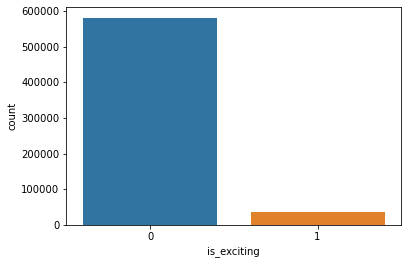

In [139]:
sns.countplot(x=train_y['is_exciting'])

In [140]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
X_train,X_test,y_train,y_test=train_test_split(x_train,train_y,test_size=0.20,random_state=400)

In [141]:
print(X_train.shape)
print(y_train.shape)

(494169, 1000)
(494169, 1)


In [150]:
sm = SMOTE(random_state=1)
#RandomOverSampler(random_state=400)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [151]:
y_train_res.head()

,is_exciting
0,0
1,0
2,0
3,0
4,0


In [152]:
y_train_res.value_counts()

is_exciting
0              464931
1              464931
dtype: int64

In [153]:
X_train_res.shape

(929862, 1000)

In [154]:
y_train_res.shape

(929862, 1)

In [155]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical

Using TensorFlow backend.
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packag

In [156]:
y_cat=to_categorical(y_train_res)

In [157]:
y_cat

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [158]:
model=Sequential()

In [159]:
model.add(Dense(514,input_shape=(1000,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [160]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [161]:
history = model.fit(X_train_res, y_cat,epochs=5,batch_size=64,verbose=1,validation_split=0.30)


Train on 650903 samples, validate on 278959 samples
Epoch 1/5
650903/650903 [==============================] - 175s 268us/step - loss: 0.3742 - accuracy: 0.8365 - val_loss: 0.3483 - val_accuracy: 0.8720
Epoch 2/5
650903/650903 [==============================] - 165s 254us/step - loss: 0.2306 - accuracy: 0.9135 - val_loss: 0.2165 - val_accuracy: 0.9284
Epoch 3/5
650903/650903 [==============================] - 176s 270us/step - loss: 0.1851 - accuracy: 0.9304 - val_loss: 0.1473 - val_accuracy: 0.9560
Epoch 4/5
650903/650903 [==============================] - 185s 284us/step - loss: 0.1580 - accuracy: 0.9408 - val_loss: 0.1345 - val_accuracy: 0.9584
Epoch 5/5
650903/650903 [==============================] - 166s 256us/step - loss: 0.1404 - accuracy: 0.9474 - val_loss: 0.0830 - val_accuracy: 0.9785


In [162]:
preds=model.predict_classes(X_test)
print(preds)
pred_test = model.predict_classes(x_test)
print(pred_test)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
prediction = model.predict(X_test)
print(prediction)
predi_test = model.predict(x_test)
print(predi_test)

In [ ]:
prob = model.predict_proba(X_test)
prob

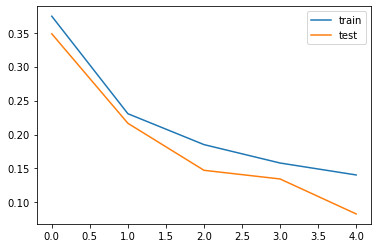

In [163]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

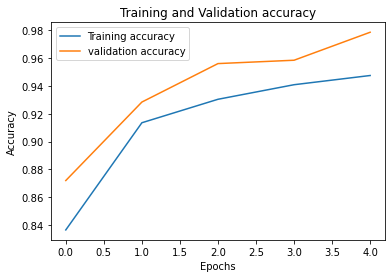

In [164]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
plt.plot(loss_train, label='Training accuracy')
plt.plot(loss_val, label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [165]:
from sklearn.ensemble import RandomForestClassifier


In [166]:
rnd = RandomForestClassifier(n_estimators=30,oob_score=True,random_state=400, class_weight='balanced')

In [167]:
rnd.fit(X_train,y_train)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(class_weight='balanced', n_estimators=30, oob_score=True,
                       random_state=400)

In [168]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
rnd_pred= rnd.predict(X_test)
print(accuracy_score(y_test, rnd_pred))

0.9381268060513344


In [194]:
pred = rnd.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [199]:
test.head()

,projectid,essay
0,316ed8fb3b81402ff6ac8f721bb31192,Can we read one more chapter? Do we have to go...
1,90de744e368a7e4883223ca49318ae30,Engaging reading materials sent right to my st...
2,32943bb1063267de6ed19fc0ceb4b9a7,Our second grade in rural Oregon is an adventu...
3,bb18f409abda2f264d5acda8cab577a9,Help give 12 Brooklyn students access and orga...
4,24761b686e18e5eace634607acbcc19f,Technology is changing the world as we speak. ...


In [200]:
df = pd.DataFrame(test['projectid'])

In [201]:
df.head()

,projectid
0,316ed8fb3b81402ff6ac8f721bb31192
1,90de744e368a7e4883223ca49318ae30
2,32943bb1063267de6ed19fc0ceb4b9a7
3,bb18f409abda2f264d5acda8cab577a9
4,24761b686e18e5eace634607acbcc19f


In [202]:
df['is_exciting'] = pred

In [203]:
df.head()

,projectid,is_exciting
0,316ed8fb3b81402ff6ac8f721bb31192,0
1,90de744e368a7e4883223ca49318ae30,0
2,32943bb1063267de6ed19fc0ceb4b9a7,0
3,bb18f409abda2f264d5acda8cab577a9,0
4,24761b686e18e5eace634607acbcc19f,0


In [204]:
df.to_csv('prediction.csv', index=False)